## Multiple Linear Regression model

### MLR assumptions

Multivariate Normality

No Multicollinearity

Homoscedasticity

Independence

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df_raw2_train= pd.read_csv('df_raw2_train.csv') #import train and validation dataset of 3203 data points
df_raw2_train.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,1.0,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,686.0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,258.0,...,0,0,0,0,0,1,0,0,0,0
2,3.0,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,1339.0,...,0,0,0,0,0,1,0,0,0,0
3,5.0,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,323.0,...,0,0,0,0,0,1,0,0,0,0
4,6.0,1398.0,392.0,156.0,0.0,4000.0,880.0,24000.0,336530303.0,554.0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df_raw2_train.shape

(3203, 673)

In [4]:
df_raw2_test=pd.read_csv('df_raw2_test.csv')
df_raw2_test.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,365.0,766.0,148.0,128.0,323.0,489.0,56.0,13000.0,100012500.0,181.0,...,0,0,0,0,0,0,0,1,0,0
1,1367.0,603.0,194.0,112.0,5.0,724.0,1323.0,17000.0,34912982.0,238.0,...,0,0,0,0,0,1,0,0,0,0
2,4726.0,225.0,235.0,79.0,9.0,7.0,1847.0,48.0,30500882.0,146.0,...,0,0,0,0,0,0,0,1,0,0
3,1511.0,1626.0,297.0,113.0,47.0,129.0,102.0,988.0,102413606.0,774.0,...,0,0,0,0,0,1,0,0,0,0
4,3849.0,315.0,234.0,102.0,0.0,167.0,1357.0,1000.0,3609278.0,413.0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df_raw2_test.shape

(360, 673)

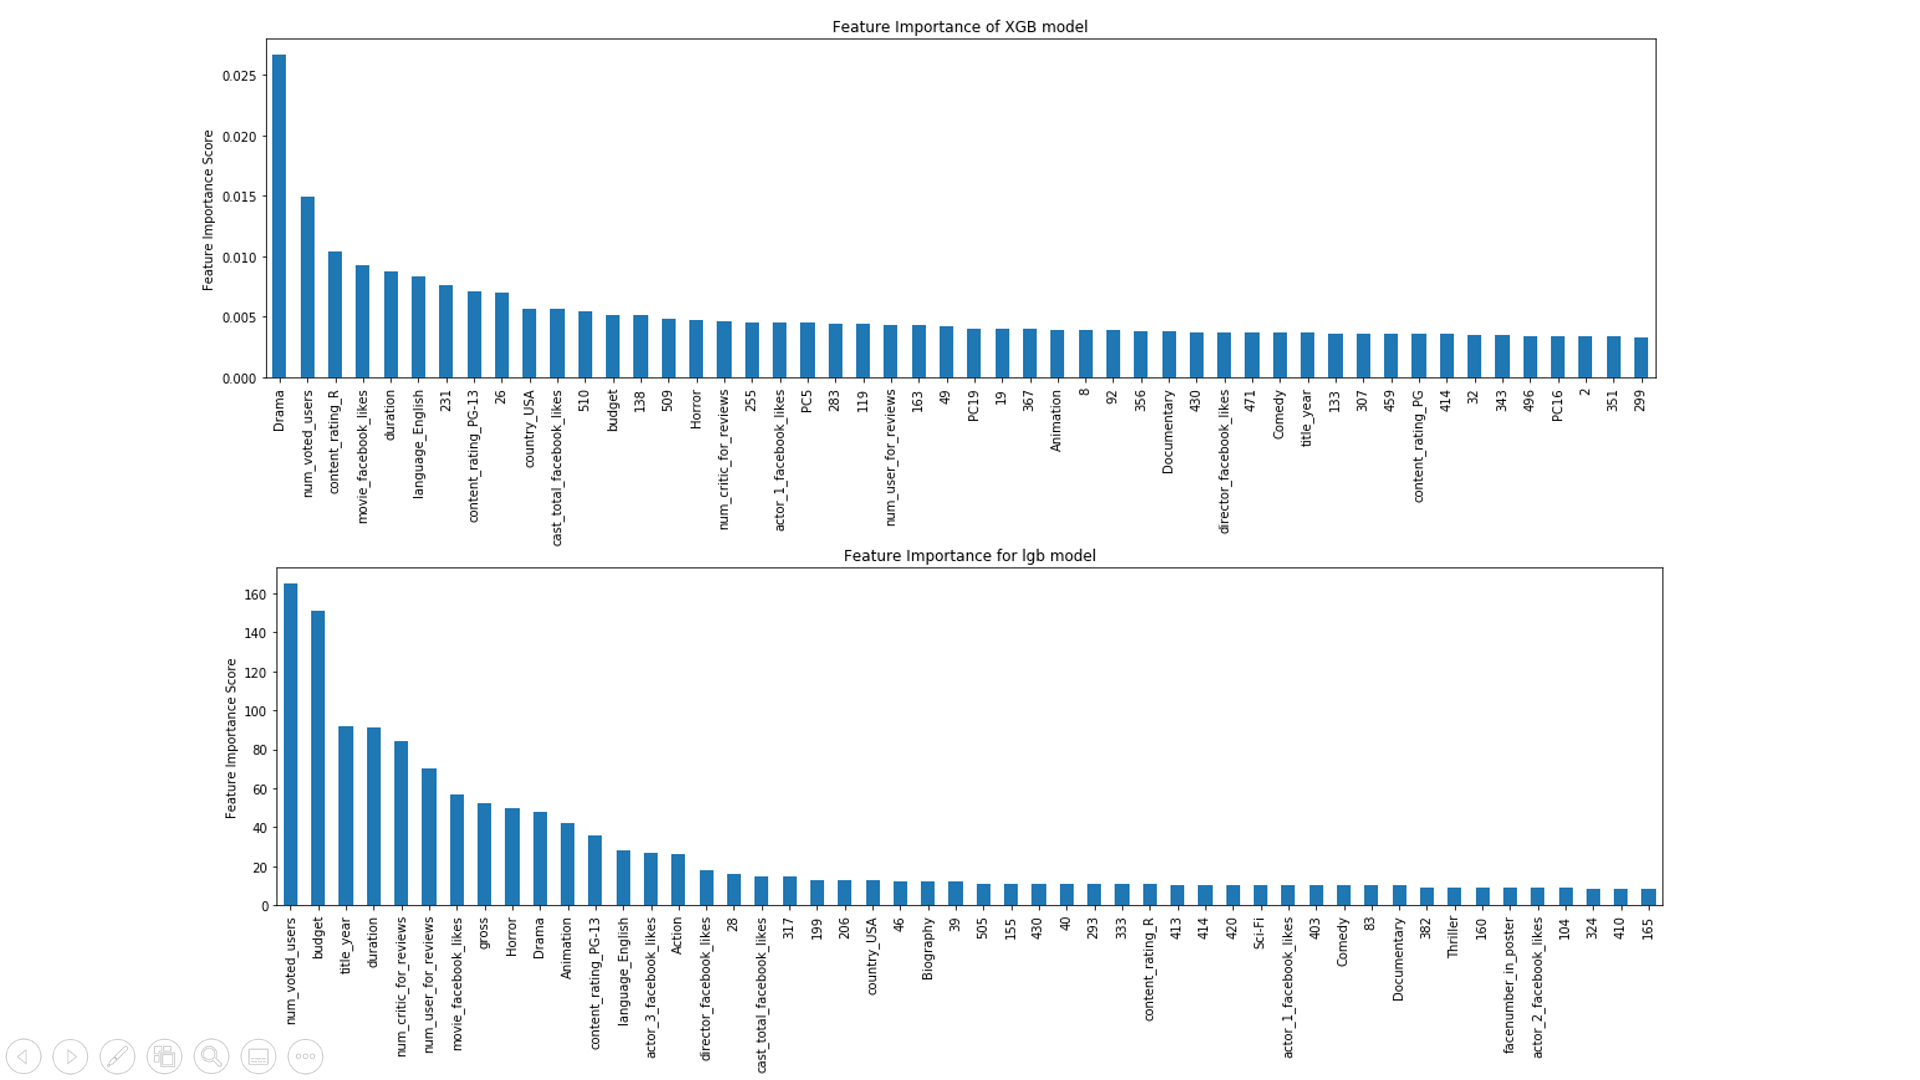

In [6]:
from IPython.display import Image
Image(filename='FeatureImportance.png')

# most important features in common of both models:
# num_voted_users , Drama , budget , duration, country_USA,   movie_facebook_likes,
# content_rating_R,
# content_rating_PG-13, Horror, Animation,
# Comedy, Documentary,

# title_year,

# actor_1_facebook_likes,
# cast_total_facebook_likes,

# num_critic_for_reviews,
# director_facebook_likes,

#### as we can see from the feature importance plots below (generated in notebooks XGB-parametersTune and LightGBM-ParametersTune), XGB model picked more NLP transformed features in the top list.
#### I decide not to use any NLP transformed features in this linear regression model due to interpretability.
#### LGB model picked gross feature but XGB did not.

## Check assumptions

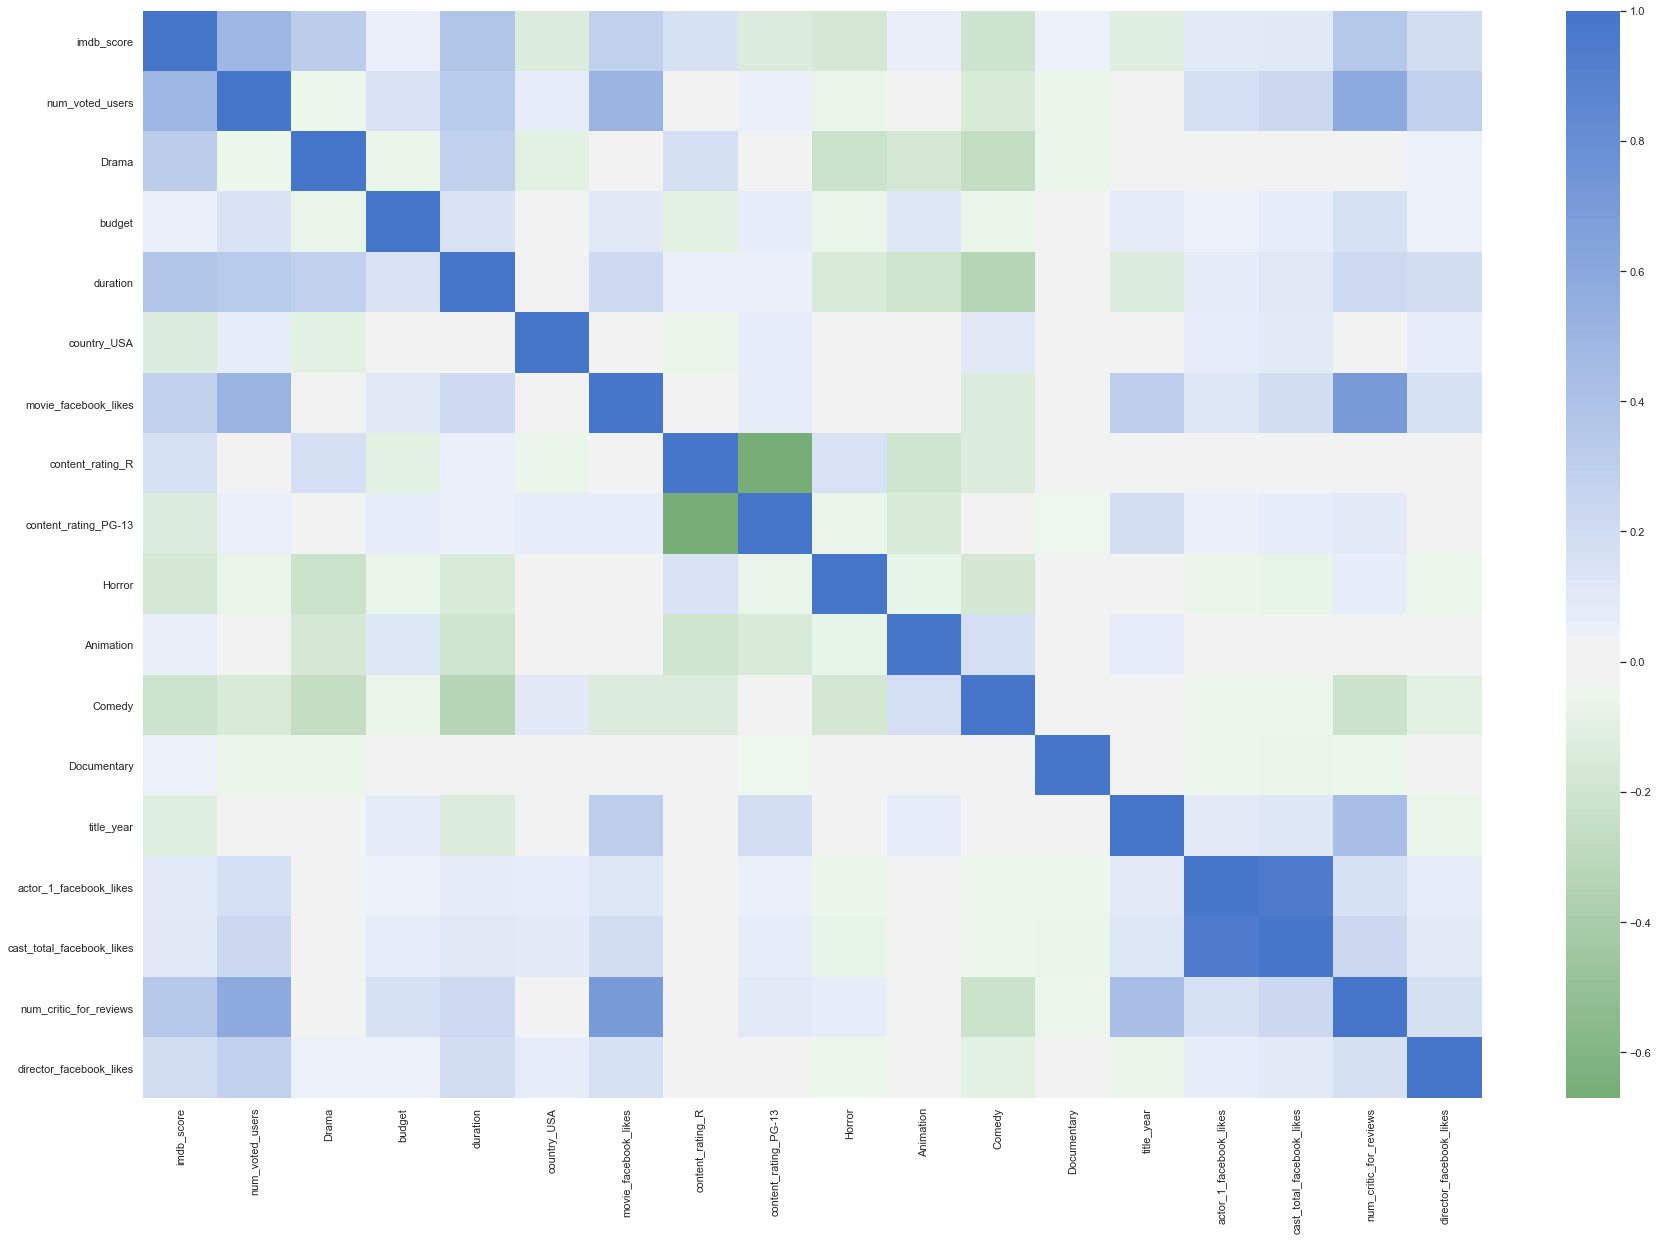

In [24]:
df1= df_raw2_train[["imdb_score",'num_voted_users' , 'Drama' , 'budget' , 'duration', 'country_USA',   'movie_facebook_likes',
                   'content_rating_R', 'content_rating_PG-13', 'Horror', 'Animation',
                   'Comedy', 'Documentary', 'title_year', 'actor_1_facebook_likes', 'cast_total_facebook_likes',
                    'num_critic_for_reviews','director_facebook_likes' ]] 

danpallet= sns.diverging_palette(128, 255, l=50, n=7, center="light",as_cmap=True)
plt.figure(figsize=(30,20))
c= df1.corr()
sns.heatmap(c,annot=False, center=0, cmap=danpallet)

From the pair plot we can see movie_facebook_likes, num_critic_for_reviews are postively highly correlated to num_voted_users. 

content_rating_R and content_rating_PG-13 are negatively highly correlated.

so we decide to keep only  num_voted_users and content_rating_R.


Other than that, there doesn't seem to be a lot of obvious coorelation among features.

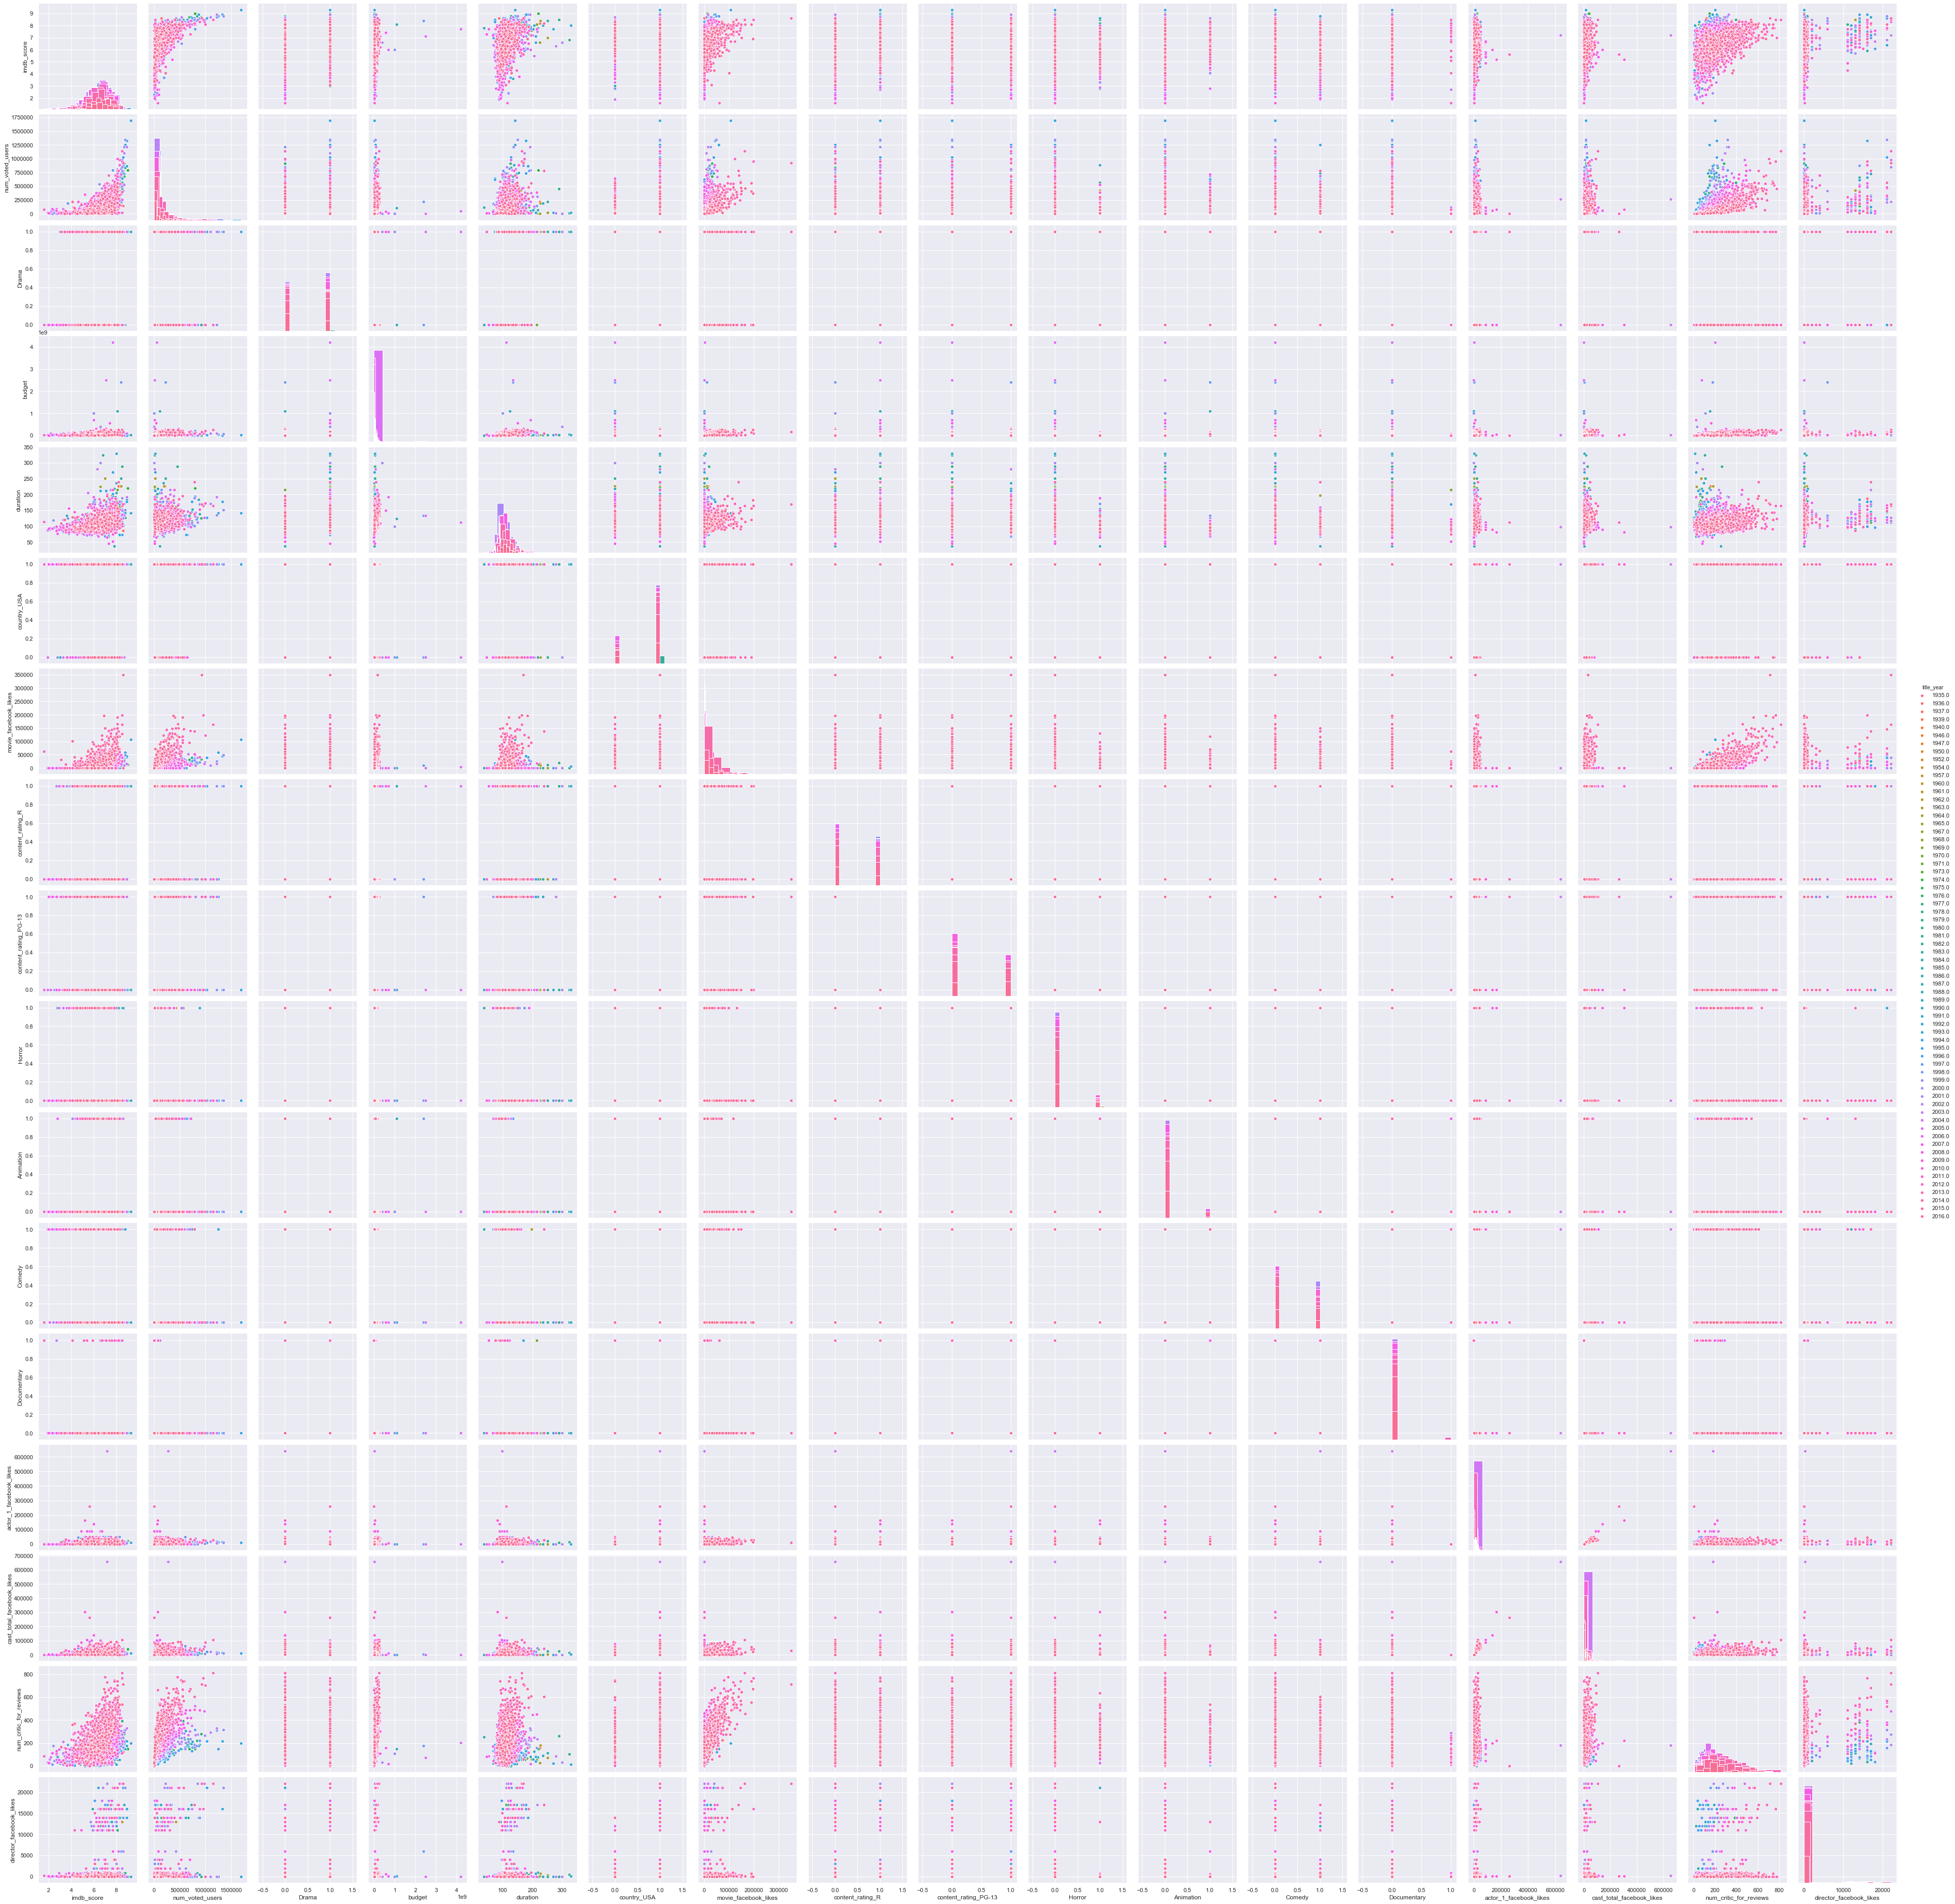

In [26]:
sns.pairplot(df1, hue="title_year", size=3, diag_kind='hist')

In [8]:
important_feats = ['num_voted_users' , 'Drama' , 'budget' , 'duration', 'country_USA',   
                   'content_rating_R',  'Horror', 'Animation',
                   'Comedy', 'Documentary', 'title_year', 'actor_1_facebook_likes', 'cast_total_facebook_likes',
                    'director_facebook_likes' ] 

#important_feats are important features in both lgb and xgb models


# In addition, as we found earlier in EDA, num_user_for_reviews and num_voted_users are highly correlated. 
# If we build a multiple linear regression model, we need to exclude one of these two features.
# keep num_voted_users since it has higher importance in both lgb and xgb models.


## Define train and test datasets

In [9]:
df=df_raw2_train

X_train = df[important_feats]
y_train = df["imdb_score"]
X_train.head()

,num_voted_users,Drama,budget,duration,country_USA,content_rating_R,Horror,Animation,Comedy,Documentary,title_year,actor_1_facebook_likes,cast_total_facebook_likes,director_facebook_likes
0,471220.0,0.0,300000000.0,169.0,1,0,0.0,0.0,0.0,0.0,2007.0,40000.0,48350.0,563.0
1,275868.0,0.0,245000000.0,148.0,0,0,0.0,0.0,0.0,0.0,2015.0,11000.0,11700.0,0.0
2,1144337.0,0.0,250000000.0,164.0,1,0,0.0,0.0,0.0,0.0,2012.0,27000.0,106759.0,22000.0
3,212204.0,0.0,263700000.0,132.0,1,0,0.0,0.0,0.0,0.0,2012.0,640.0,1873.0,475.0
4,383056.0,0.0,258000000.0,156.0,1,0,0.0,0.0,0.0,0.0,2007.0,24000.0,46055.0,0.0


In [20]:
X_test=df_raw2_test[important_feats]
y_test=df_raw2_test["imdb_score"]
X_test.head()

,num_voted_users,Drama,budget,duration,country_USA,content_rating_R,Horror,Animation,Comedy,Documentary,title_year,actor_1_facebook_likes,cast_total_facebook_likes,director_facebook_likes
0,299258.0,0.0,90000000.0,128.0,1,1,0.0,0.0,0.0,0.0,1995.0,13000.0,14274.0,323.0
1,55617.0,0.0,38000000.0,112.0,1,0,0.0,0.0,0.0,0.0,2016.0,17000.0,19974.0,5.0
2,42256.0,1.0,500000.0,79.0,1,1,1.0,0.0,0.0,0.0,2003.0,48.0,67.0,9.0
3,310903.0,0.0,34000000.0,113.0,1,0,0.0,0.0,0.0,0.0,2014.0,988.0,1783.0,47.0
4,573541.0,1.0,4500000.0,102.0,1,1,0.0,0.0,0.0,0.0,2000.0,1000.0,2235.0,0.0


In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
%%time
#train our model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

Wall time: 2.46 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

33.7187137231039
[ 3.25536158e-06  5.77968412e-01 -1.94224929e-10  5.96861698e-03
 -3.30683227e-01  2.80018383e-01 -2.80397045e-01  7.58396806e-01
 -7.66711314e-02  9.37404970e-01 -1.41859600e-02  5.86103479e-06
 -3.71772833e-06  8.05637632e-06]


In [14]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
num_voted_users,3.255362e-06
Drama,5.779684e-01
budget,-1.942249e-10
duration,5.968617e-03
country_USA,-3.306832e-01
content_rating_R,2.800184e-01
Horror,-2.803970e-01
Animation,7.583968e-01
Comedy,-7.667113e-02
Documentary,9.374050e-01


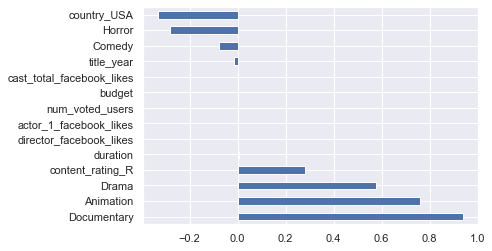

In [28]:
feat_importances = pd.Series(regressor.coef_, X_train.columns)
feat_importances.nlargest(14).plot(kind='barh')

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
print('For validation dataset:')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For validation dataset:
Mean Squared Error: 0.7966335488710099
Root Mean Squared Error: 0.8925433036391063


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,7.6,7.113483
1,5.2,5.656713
2,5.7,6.160229
3,6.8,6.496999
4,8.4,8.346657
5,5.5,6.171479
6,6.7,6.657230
7,6.0,5.855501
8,7.5,7.373584
9,8.8,10.956428


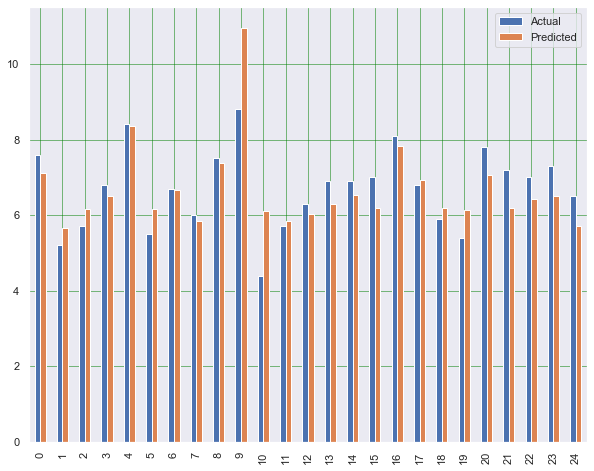

In [18]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()